In [144]:
import pandas as pd
sp500 = pd.read_csv('GSPC.csv')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4764 entries, 0 to 4763
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4764 non-null   object 
 1   Open       4764 non-null   float64
 2   High       4764 non-null   float64
 3   Low        4764 non-null   float64
 4   Close      4764 non-null   float64
 5   Adj Close  4764 non-null   float64
 6   Volume     4764 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 260.7+ KB


In [145]:
# for i in range(len(sp500['Date'])):
#     if sp500.at[i,'Date'] == pd.Timestamp('2001-01-06'):
#         print(i)
#         break

In [146]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
# add change percentage column
# Change Pct = (Close price ((N+1)th Trade day) - Close price (Nth Trade day)) / Close price (Nth Trade day)
def add_change_pct():
    for i in range(len(sp500)-1):
        value = (sp500.at[i,'Close'] - sp500.at[i+1,'Close']) / sp500.at[i+1,'Close']
        sp500.at[i,'Change Pct'] = value*100

add_change_pct()
sp500.at[4763,'Change Pct'] = sp500.at[4762,'Change Pct']


In [147]:
sp500.describe()
# No outliers found

,Open,High,Low,Close,Adj Close,Volume,Change Pct
count,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4.764000e+03,4764.000000
mean,1501.071210,1509.737119,1491.676040,1501.206245,1501.206245,3.063913e+09,0.018893
std,508.199196,508.576792,507.670336,508.191345,508.191345,1.502298e+09,1.204978
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08,-9.034978
25%,1141.990051,1148.915039,1134.349975,1141.780029,1141.780029,1.610075e+09,-0.483281
50%,1335.879944,1344.254944,1327.209961,1335.369995,1335.369995,3.169310e+09,0.051055
75%,1852.242493,1866.952515,1841.217499,1852.780030,1852.780030,3.926060e+09,0.565897
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10,11.580037


In [148]:
# Sort the data frame by date 
sp500.sort_values(by='Date',inplace=True)
sp500 = sp500.reset_index(drop=True)

In [149]:
sp500

,Date,Open,High,Low,Close,Adj Close,Volume,Change Pct
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,-3.834467
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-3.834467
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.192218
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.095568
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,2.709040
...,...,...,...,...,...,...,...,...
4759,2018-11-30,2737.760010,2760.879883,2732.760010,2760.169922,2760.169922,4658580000,0.817075
4760,2018-12-03,2790.500000,2800.179932,2773.379883,2790.370117,2790.370117,4186060000,1.094143
4761,2018-12-04,2782.429932,2785.929932,2697.179932,2700.060059,2700.060059,4499840000,-3.236490
4762,2018-12-06,2663.510010,2696.149902,2621.530029,2695.949951,2695.949951,5141470000,-0.152223


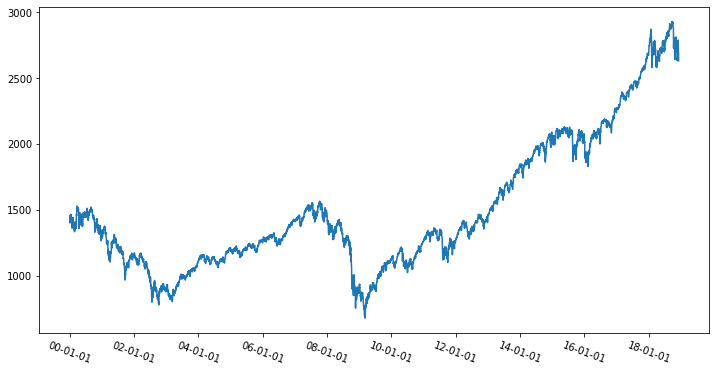

In [150]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(12,6))
plt.plot(sp500['Date'],sp500['Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.xticks(rotation=-20)
plt.show()

In [151]:
# copy the dataset
sp = sp500[['Close','Adj Close','Open','High','Low','Volume','Change Pct']]
sp

,Close,Adj Close,Open,High,Low,Volume,Change Pct
0,1455.219971,1455.219971,1469.250000,1478.000000,1438.359985,931800000,-3.834467
1,1399.420044,1399.420044,1455.219971,1455.219971,1397.430054,1009000000,-3.834467
2,1402.109985,1402.109985,1399.420044,1413.270020,1377.680054,1085500000,0.192218
3,1403.449951,1403.449951,1402.109985,1411.900024,1392.099976,1092300000,0.095568
4,1441.469971,1441.469971,1403.449951,1441.469971,1400.729980,1225200000,2.709040
...,...,...,...,...,...,...,...
4759,2760.169922,2760.169922,2737.760010,2760.879883,2732.760010,4658580000,0.817075
4760,2790.370117,2790.370117,2790.500000,2800.179932,2773.379883,4186060000,1.094143
4761,2700.060059,2700.060059,2782.429932,2785.929932,2697.179932,4499840000,-3.236490
4762,2695.949951,2695.949951,2663.510010,2696.149902,2621.530029,5141470000,-0.152223


In [152]:
# data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# train_norm = scaler.fit_transform(train)
# test_norm = scaler.fit_transform(test)

norm = scaler.fit_transform(sp)
print(norm)

[[0.34543654 0.34543654 0.34993443 ... 0.34135431 0.05186682 0.25226812]
 [0.320683   0.320683   0.34371952 ... 0.32324628 0.05882167 0.25226812]
 [0.32187629 0.32187629 0.31900173 ... 0.31450858 0.06571347 0.4475959 ]
 ...
 [0.89766307 0.89766307 0.93163613 ... 0.89827539 0.37330723 0.28127496]
 [0.89583978 0.89583978 0.87895795 ... 0.86480673 0.4311109  0.43088764]
 [0.86794992 0.86794992 0.89125042 ... 0.86551895 0.34779859 0.3251497 ]]


In [153]:
# divide S&P500 index dataset 4764*0.8 = 3811.2
train_norm = norm[0:3810]
test_norm = norm[3810:]

In [167]:
# divide data into 50 rows per input
timestamp = 30

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(timestamp, len(train_norm)):
    X_train.append(train_norm[i - timestamp:i])
    y_train.append(train_norm[i,0])
    
for i in range(timestamp, len(test_norm)):
    X_test.append(test_norm[i - timestamp:i])
    y_test.append(test_norm[i,0])

import numpy as np
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)


print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (3780, 30, 7)
X_test: (924, 30, 7)
y_train: (3780,)
y_test: (924,)


In [168]:
y_train

array([0.3218497 , 0.31547055, 0.31573227, ..., 0.63575423, 0.63833608,
       0.63761749])

In [169]:
# data prediction
from keras import Input
from keras.models import Sequential, Model
from keras.layers import SimpleRNN, LSTM, Dense, Dropout, Activation, Reshape   

epochs = 15

# iteration number of batches
batch_size = 20

input_dim = X_train.shape[-1]
output_dim = 1
units = 30
timesteps = 30

In [170]:
# y_test[].shape

In [171]:

import time

In [172]:
'''RNN'''
rnn_start = time.time()

input_layer = Input(shape=(timesteps, input_dim))
# rnn_input = Reshape(target_shape=(seq_length, units))(Input_layer)
rnn_output = SimpleRNN(units, activation='relu')(input_layer)
rnn_hidden_layer = Dense(128)(rnn_output)
output_layer = Dense(output_dim)(rnn_output)
rnn_model = Model(inputs=input_layer, outputs=output_layer)
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

rnn_end = time.time()
rnn_time = rnn_end - rnn_start

Epoch 1/15
3780/3780 [==============================] - 1s 315us/step - loss: 0.0097
Epoch 2/15
3780/3780 [==============================] - 1s 165us/step - loss: 2.2236e-04
Epoch 3/15
3780/3780 [==============================] - 1s 165us/step - loss: 1.4569e-04
Epoch 4/15
3780/3780 [==============================] - 1s 168us/step - loss: 1.0820e-04
Epoch 5/15
3780/3780 [==============================] - 1s 169us/step - loss: 8.8178e-05
Epoch 6/15
3780/3780 [==============================] - 1s 171us/step - loss: 7.4296e-05
Epoch 7/15
3780/3780 [==============================] - 1s 169us/step - loss: 6.6182e-05
Epoch 8/15
3780/3780 [==============================] - 1s 167us/step - loss: 6.5623e-05
Epoch 9/15
3780/3780 [==============================] - 1s 173us/step - loss: 6.4044e-05
Epoch 10/15
3780/3780 [==============================] - 1s 176us/step - loss: 5.8625e-05
Epoch 11/15
3780/3780 [==============================] - 1s 175us/step - loss: 5.9720e-05
Epoch 12/15
3780/3780 [

In [173]:
print('\n'+str(rnn_time)+'s')


10.45384955406189s


In [ ]:
rnn_model.summary()

In [ ]:
rnn_predict = rnn_model.predict(X_test)
scaler.fit_transform(pd.DataFrame(sp['Close'].values))

# denormalization
rnn_predict = scaler.inverse_transform(rnn_predict)
# print(rnn_predict)

#y_test = scaler.inverse_transform([y_test])
# print(y_test)

In [ ]:
plt.figure(figsize=(10,8))
rnn_plot = {
    
    'Predictions': rnn_predict.reshape(1,-1)[0],
    'Close': y_test[0]
}

rnn_pd = pd.DataFrame(rnn_plot)

x = sp500['Date'][3860:]
plt.plot(x, rnn_pd['Close'], label="Real Closing Price")
plt.plot(x, rnn_pd['Predictions'], label="Predicted Closing Price")
plt.yticks([i * 100 for i in range(15,35,5)])

plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
# plt.plot(sp500['Date'][3860:],rnn_pd[['Close', 'Predictions']])
plt.savefig('sp_rnn.png', transparent=True, dpi=100)

plt.show()

In [ ]:
# rnn_pd.shape

In [ ]:
# sp500['Date'][3860:].shape

In [174]:
'''LSTM'''
lstm_start = time.time()

input_layer = Input(shape=(timesteps, input_dim))
# lstm_input = Reshape(target_shape=(timesteps, lstm_units))(input_layer)
lstm_output = LSTM(units, activation='relu')(input_layer)
output_layer = Dense(output_dim)(lstm_output)
lstm_model = Model(inputs=input_layer,outputs=output_layer)
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

lstm_end = time.time()
lstm_time = lstm_end - lstm_start
print('\n'+str(lstm_time)+'s')
# lstm_model = Sequential()
# lstm_model.add(Input(shape=(timesteps, input_dim)))
# lstm_model.add(LSTM(units, activation='relu'))
# lstm_model.add(Dense(output_dim))
# combined_model.compile(optimizer='adam', loss='mean_squared_error')
# lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/15
3780/3780 [==============================] - 3s 796us/step - loss: 0.0117
Epoch 2/15
3780/3780 [==============================] - 2s 615us/step - loss: 1.5985e-04
Epoch 3/15
3780/3780 [==============================] - 2s 599us/step - loss: 1.0485e-04
Epoch 4/15
3780/3780 [==============================] - 3s 832us/step - loss: 8.9213e-05
Epoch 5/15
3780/3780 [==============================] - 3s 864us/step - loss: 8.1620e-05
Epoch 6/15
3780/3780 [==============================] - 3s 873us/step - loss: 7.4809e-05
Epoch 7/15
3780/3780 [==============================] - 3s 886us/step - loss: 6.9221e-05
Epoch 8/15
3780/3780 [==============================] - 4s 1ms/step - loss: 6.5318e-05
Epoch 9/15
3780/3780 [==============================] - 3s 897us/step - loss: 5.9560e-05
Epoch 10/15
3780/3780 [==============================] - 4s 932us/step - loss: 5.8555e-05
Epoch 11/15
3780/3780 [==============================] - 4s 939us/step - loss: 5.6125e-05
Epoch 12/15
3780/3780 [==

In [ ]:
lstm_predict = lstm_model.predict(X_test)
# scaler.fit_transform(pd.DataFrame(test['Close'].values))

# denormalization
lstm_predict = scaler.inverse_transform(lstm_predict)

In [ ]:
plt.figure(figsize=(10,8))
lstm_plot = {
    
    # transform the data shape into (736,1)
    'Predictions': lstm_predict.reshape(1,-1)[0],
    'Close': y_test[0]
}

lstm_pd = pd.DataFrame(lstm_plot)

x = sp500['Date'][3860:]
plt.plot(x, lstm_pd['Close'], label="Real Closing Price")
plt.plot(x, lstm_pd['Predictions'], label="Predicted Closing Price")
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
plt.yticks([i * 100 for i in range(15,35,5)])

plt.savefig('sp_lstm.png', transparent=True, dpi=200)

plt.show()

In [175]:
from keras.layers import Conv1D, Conv2D, Flatten, concatenate, MaxPooling1D, MaxPooling2D, Bidirectional, MaxPooling2D, TimeDistributed
# Combined Model: CNN + LSTM
# drop_out=.1

'''combined model'''
combined_start = time.time()

combined_model = Sequential()

'''cnn'''
combined_model.add(TimeDistributed(Conv1D(filters = 20, kernel_size = (2,), activation = 'relu'),input_shape=(timesteps,input_dim, 1)))
# combined_model.add(TimeDistributed(Conv1D(filters = 20, kernel_size = (2,), activation = 'relu', input_shape=(timesteps,input_dim, 1)))
# combined_model.add(TimeDistributed(MaxPooling1D(pool_size = 3)))
# combined_model.add(Dropout(0.1))
combined_model.add(TimeDistributed(Flatten()))
combined_model.add(Dense(64, activation='relu'))
# combined_model.add(Dropout(0.1))

'''lstm'''
combined_model.add(LSTM(units, activation='relu'))
# combined_model.add(LSTM(100, return_sequences=False))
combined_model.add(Dense(output_dim))
combined_model.compile(optimizer='adam', loss='mean_squared_error')
# combined_model.summary()


In [165]:
combined_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_3 (TimeDist (None, 50, 6, 20)         60        
_________________________________________________________________
time_distributed_4 (TimeDist (None, 50, 120)           0         
_________________________________________________________________
dense_26 (Dense)             (None, 50, 64)            7744      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                11400     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 31        
Total params: 19,235
Trainable params: 19,235
Non-trainable params: 0
_________________________________________________________________


In [176]:
X_train_r = X_train.reshape((-1,timesteps,input_dim,1))
combined_model.fit(X_train_r, y_train, epochs=epochs, batch_size=batch_size)

combined_end = time.time()
combined_time = combined_end - combined_start
print('\n'+str(combined_time)+'s')

Epoch 1/15
3780/3780 [==============================] - 3s 913us/step - loss: 0.0052
Epoch 2/15
3780/3780 [==============================] - 3s 689us/step - loss: 8.3849e-05
Epoch 3/15
3780/3780 [==============================] - 3s 683us/step - loss: 7.6979e-05
Epoch 4/15
3780/3780 [==============================] - 2s 657us/step - loss: 7.1982e-05
Epoch 5/15
3780/3780 [==============================] - 3s 687us/step - loss: 6.3527e-05
Epoch 6/15
3780/3780 [==============================] - 3s 715us/step - loss: 6.1851e-05
Epoch 7/15
3780/3780 [==============================] - 3s 673us/step - loss: 6.0514e-05
Epoch 8/15
3780/3780 [==============================] - 3s 670us/step - loss: 6.3885e-05
Epoch 9/15
3780/3780 [==============================] - 3s 677us/step - loss: 6.4514e-05
Epoch 10/15
3780/3780 [==============================] - 3s 919us/step - loss: 5.4376e-05
Epoch 11/15
3780/3780 [==============================] - 4s 980us/step - loss: 5.3622e-05
Epoch 12/15
3780/3780 [

In [373]:
# print(X_train_r.shape)
# print(X_train_r)

In [374]:
X_test_r = X_test.reshape((-1,timesteps,input_dim,1))
print(X_test_r.shape)
# print(X_train_r[0])
combined_predict = combined_model.predict(X_test_r)

print(combined_predict.shape)
# denormalization

combined_predict = scaler.inverse_transform(combined_predict)
# y_test = scaler.inverse_transform([y_test])

# print(combined_predict.reshape(1,-1)[0])

(924, 30, 7, 1)
(924, 1)


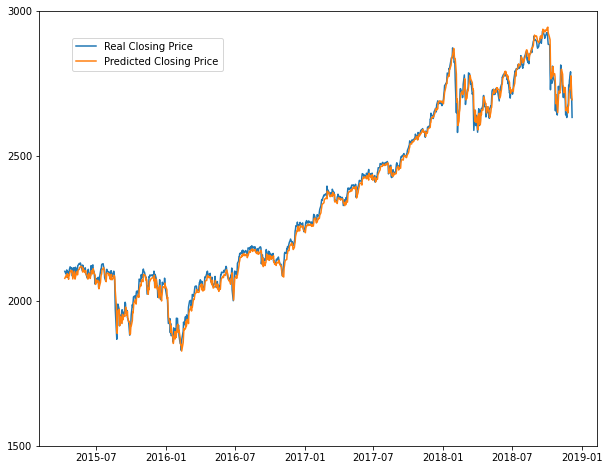

In [375]:
plt.figure(figsize=(10,8))
combined_plot = {
    
    # transform the data shape into (736,1)
    'Predictions': combined_predict.reshape(1,-1)[0],
    'Close': y_test[0]
}

combined_pd = pd.DataFrame(combined_plot)

x = sp500['Date'][3860:]
plt.plot(x, combined_pd['Close'], label="Real Closing Price")
plt.plot(x, combined_pd['Predictions'], label="Predicted Closing Price")
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
plt.yticks([i * 100 for i in range(15,35,5)])

plt.savefig('sp_combined.png', transparent=True, dpi=100)

# plt.plot(data_pd[['Close', 'Predictions']])
plt.show()

In [376]:
print(lstm_predict.shape)
# print(y_test.shape)
# plt.hist(np.abs((combined_predict - y_test[0])/y_test[0]))

(924, 1)


In [378]:
'''Evaluation'''
# MSE：
from sklearn.metrics import mean_squared_error
# MAE：体现预测值的误差大小
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_absolute_percentage_error
# MAPE: 预测值较真实值的平均偏离程度

rnn_rmse = np.sqrt(mean_squared_error(y_test[0], rnn_predict[:,0]))
lstm_rmse = np.sqrt(mean_squared_error(y_test[0], lstm_predict[:,0]))
combined_rmse = np.sqrt(mean_squared_error(y_test[0], combined_predict[:,0]))

rnn_mae = mean_absolute_error(y_test[0], rnn_predict[:,0])
lstm_mae = mean_absolute_error(y_test[0], lstm_predict[:,0])
combined_mae = mean_absolute_error(y_test[0], combined_predict[:,0])

def mape(y_pred, y_true):
    return np.mean(np.abs((y_pred - y_true) / y_true)) 


rnn_mape = mape(rnn_predict[:,0], y_test[0])
lstm_mape = mape(lstm_predict[:,0], y_test[0])
combined_mape = mape(combined_predict[:,0], y_test[0])

pd.DataFrame.from_records([[rnn_mae, "{:.2%}".format(rnn_mape), rnn_rmse], [lstm_mae, "{:.2%}".format(lstm_mape), lstm_rmse],
                           [combined_mae, "{:.2%}".format(combined_mape), combined_rmse]], 
                          columns=['MAE', 'MAPE', 'RMSE'], 
                          index=['RNN model', 'LSTM model', 'CNN+LSTM model'])

,MAE,MAPE,RMSE
RNN model,21.625067,0.90%,28.324157
LSTM model,17.613056,0.75%,22.956064
CNN+LSTM model,16.609699,0.72%,22.296593
